In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carbon = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (1).csv')

In [3]:
carbon.head()
j = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (1).csv')
f = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (2).csv')
m = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (3).csv')
a = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (4).csv')
ma = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (5).csv')
ju = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (6).csv')
jul = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (7).csv')
aug = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (8).csv')
sep = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (9).csv')
oc = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (10).csv')
no = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (11).csv')
de = pd.read_csv('../Data/London_intensity/Carbon_Intensity_Data (12).csv')


carbon = j.append(f).append(m).append(a).append(ma).append(ju).append(jul).append(aug).append(sep).append(oc).append(
    no).append(de)

In [4]:
carbon.drop(['Forecast Carbon Intensity (gCO2/kWh)', 'Index'], axis=1, inplace = True)
carbon.tail()

,Datetime (UTC),Actual Carbon Intensity (gCO2/kWh)
1436,2018-12-30T22:00Z,201.0
1437,2018-12-30T22:30Z,194.0
1438,2018-12-30T23:00Z,183.0
1439,2018-12-30T23:30Z,171.0
1440,2018-12-31T00:00Z,167.0


In [5]:
carbon_intensity = carbon.drop_duplicates()
carbon_intensity.reset_index(inplace = True)

In [6]:
len(carbon_intensity)
carbon_intensity.head()

,index,Datetime (UTC),Actual Carbon Intensity (gCO2/kWh)
0,0,2018-01-01T00:00Z,155.0
1,1,2018-01-01T00:30Z,157.0
2,2,2018-01-01T01:00Z,164.0
3,3,2018-01-01T01:30Z,171.0
4,4,2018-01-01T02:00Z,172.0


In [7]:
carbon_intensity.index = carbon_intensity["Datetime (UTC)"]

In [8]:
carbon_intensity.drop(["index", "Datetime (UTC)"], axis = 1, inplace = True)

C:\Users\Kirsch\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
carbon_intensity.index = pd.to_datetime(carbon_intensity.index)

In [10]:
carbon_intensity.head()

,Actual Carbon Intensity (gCO2/kWh)
Datetime (UTC),
2018-01-01 00:00:00+00:00,155.0
2018-01-01 00:30:00+00:00,157.0
2018-01-01 01:00:00+00:00,164.0
2018-01-01 01:30:00+00:00,171.0
2018-01-01 02:00:00+00:00,172.0


Get mean hourly CO2 emissions

In [11]:
hourly_carbon_intensity = carbon_intensity.resample('H').sum()

In [12]:
hourly_carbon_intensity["Actual Carbon Intensity (gCO2/kWh)"] = hourly_carbon_intensity["Actual Carbon Intensity (gCO2/kWh)"]/2

In [13]:
hourly_carbon_intensity.head()

,Actual Carbon Intensity (gCO2/kWh)
Datetime (UTC),
2018-01-01 00:00:00+00:00,156.0
2018-01-01 01:00:00+00:00,167.5
2018-01-01 02:00:00+00:00,172.0
2018-01-01 03:00:00+00:00,171.0
2018-01-01 04:00:00+00:00,161.5


In [14]:
hourly_carbon_intensity["Hour"] = pd.to_datetime(hourly_carbon_intensity.index).hour
hourly_carbon_intensity["Weekday"] = pd.to_datetime(hourly_carbon_intensity.index).weekday

In [15]:
hourly_carbon_intensity.tail()

,Actual Carbon Intensity (gCO2/kWh),Hour,Weekday
Datetime (UTC),,,
2018-12-30 20:00:00+00:00,238.0,20,6
2018-12-30 21:00:00+00:00,212.5,21,6
2018-12-30 22:00:00+00:00,197.5,22,6
2018-12-30 23:00:00+00:00,177.0,23,6
2018-12-31 00:00:00+00:00,83.5,0,0


Get intensity values for a mean standard week 

In [16]:
mean_c_intensities = hourly_carbon_intensity.groupby(["Weekday","Hour"])['Actual Carbon Intensity (gCO2/kWh)'].apply(lambda x: np.mean(x)).to_frame()

In [17]:
mean_c_intensities.head()

Actual Carbon Intensity (gCO2/kWh)
Weekday Hour                                    
0       0                             206.339623
        1                             214.980769
        2                             214.673077
        3                             215.509615
        4                             216.461538

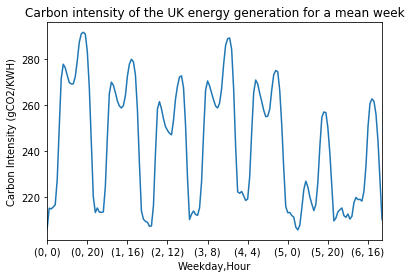

In [34]:
r = mean_c_intensities["Actual Carbon Intensity (gCO2/kWh)"]
plt.title("Carbon intensity of the UK energy generation for a mean week")
plt.xlabel("Time")
plt.ylabel("Carbon Intensity (gCO2/KWH)")
r.plot()

In [84]:
mean_c_intensities.to_csv("../Data/London_intensity/Mean_intensities.csv")